<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Capstone Project - An Automated System for Accident Severity

> Author: Irfan Muzafar (DSI-42)
---

**Problem Statement:**  
How can we develop an automated system capable of analysing images from traffic cameras or phone cameras to classify accidents into four severity classes accurately?

There are a total of three notebooks for this project:  
 1. `01_Data_Cleaning_EDA.ipynb`   
 2. `02_CNN_Pretrained_Models.ipynb`   
 3. `03_Evaluation_Conclusion.ipynb`

**This Notebook**
- Evaluate the performance of each model. 
- Hypertune best model and re-evaluate.
- Limitations, Recommendations & Conclusion

# **Part 3 - Evaluate Models, Hypertuning and Conclusion**

# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.models import Sequential, load_model # Sequential class to sequentially build the model step-by-step
from tensorflow.keras.optimizers import Adam # Adam optimizer can still be used for CNNs

from transformers import pipeline

# Dense: fully connected layers for NNs model, Dropout: to add regularization
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils # to one-hot encode response variable
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Set a random seed
np.random.seed(42)

keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

# 2. Testing Models on Unseen Data

### 2.1 Load models

We will first load our CNN, MobileNetV2 and VGG19 models that we have saved in the previous notebook. Then we will test our models on test images.

In [ ]:
# Load the saved models
cnn_model = load_model('severity_cnn.h5')
mn_model = load_model('severity_mnv2.keras')
vgg_model = load_model('severity_vgg.h5')
# efn_model = load_model('severity_efn.keras')

### 2.2 Prediction for Fire Test Image

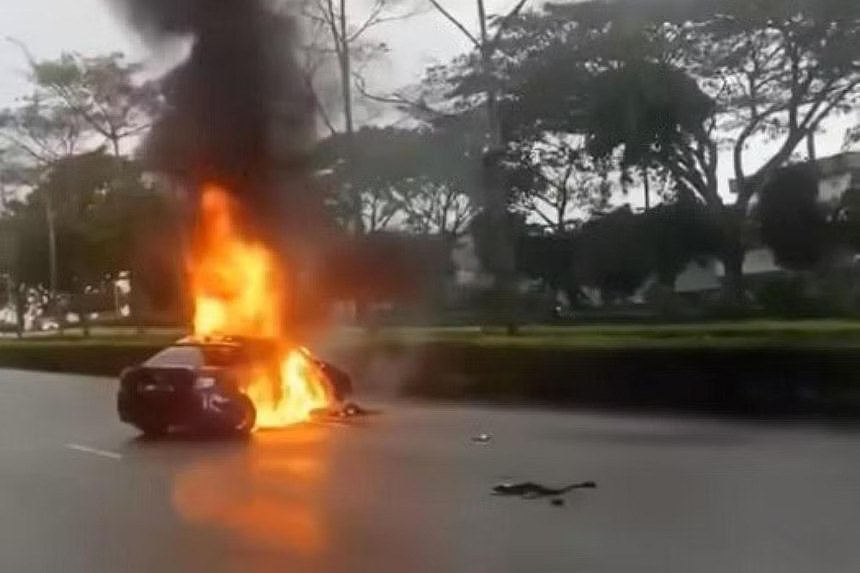

In [4]:
test_image = image.load_img(
    '../datasets/severity_detection/test/fire/test1.jpg') # Load an image for prediction into Python
test_image

Above is an image of an accident that caught fire. [(Source)](https://www.straitstimes.com/singapore/man-50-taken-to-hospital-after-car-catches-fire-on-pie) 

Before using our models to predict, we pre-process the image in the code cell below.

In [5]:
test_image = test_image.resize((224,224))
test_image = image.img_to_array(test_image) # convert loaded image to array
test_image = np.expand_dims(test_image, axis=0)
test_image = preprocess_input(test_image) # pre-process inputs to be in the same format

In [6]:
cnn_result = cnn_model.predict(test_image) # predict using the model loaded, passing prepared test_image
print(f'Our CNN model predicts: {cnn_result}') # prediction is the one with highest probability

mn_result = mn_model.predict(test_image) # predict using the model loaded, passing prepared test_image
print(f'Our MobileNetV2 model predicts: {mn_result}') # prediction is the one with highest probability

vgg_result = vgg_model.predict(test_image) # predict using the model loaded, passing prepared test_image
print(f'Our VGG19 model predicts: {vgg_result}') # prediction is the one with highest probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
Our CNN model predicts: [[   0.011691   0.0053603     0.22602     0.72496     0.03197]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Our MobileNetV2 model predicts: [[[    0.99328   0.0004947   0.0036128   0.0023401  0.00027684]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 878ms/step
Our VGG19 model predicts: [[    0.79701    0.045161    0.044376    0.083673    0.029782]]


Recall `class_mappings = {'fire': 0, 'minor': 1, 'moderate': 2, 'no_acc': 3, 'severe': 4}`. 

For CNN, the highest probability is 0.72496, the test image is predicted as 'no_acc', but the true label is 'fire'. Thus, wrong prediction.

For MobileNetV2, the highest probability is 0.99328, the test image is correctly predicted as 'fire'.

For VGG19, the highest probability is 0.79701, the test image is correctly predicted as 'fire'.

### 2.3 Prediction for Minor Test Image

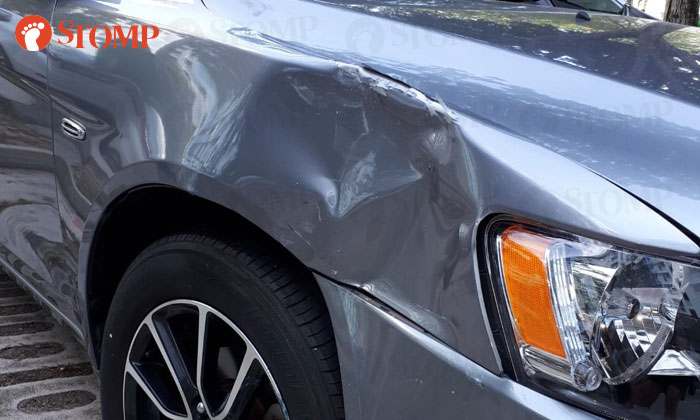

In [9]:
test_image = image.load_img(
    '../datasets/severity_detection/test/minor/test3.jpg') # Load an image for prediction into Python
test_image

Above is an image of a minor accident that caused a dent on a car. [(Source)](https://stomp.straitstimes.com/singapore-seen/police-investigating-hit-and-run-that-left-car-dented-and-damaged-at-pasir-ris). 

Before using our models to predict, we pre-process the image in the code cell below.

In [10]:
test_image = test_image.resize((224,224))
test_image = image.img_to_array(test_image) # convert loaded image to array
test_image = np.expand_dims(test_image, axis=0)
test_image = preprocess_input(test_image) # pre-process inputs to be in the same format

In [11]:
cnn_result = cnn_model.predict(test_image) # predict using the model loaded, passing prepared test_image
print(f'Our CNN model predicts: {cnn_result}') # prediction is the one with highest probability

mn_result = mn_model.predict(test_image) # predict using the model loaded, passing prepared test_image
print(f'Our MobileNetV2 model predicts: {mn_result}') # prediction is the one with highest probability

vgg_result = vgg_model.predict(test_image) # predict using the model loaded, passing prepared test_image
print(f'Our VGG19 model predicts: {vgg_result}') # prediction is the one with highest probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Our CNN model predicts: [[  0.0030308   0.0061348     0.30994     0.40495     0.27594]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
Our MobileNetV2 model predicts: [[[  0.0032067     0.32482      0.3405    0.060654     0.27082]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Our VGG19 model predicts: [[  0.0020813     0.67119     0.19491     0.10007    0.031749]]


For CNN, the highest probability is 0.40495, the test image is predicted as 'no_acc', but the true label is 'minor'. Thus, wrong prediction.

For MobileNetV2, the highest probability is 0.3405, the test image is predicted as 'moderate', but the true label is 'minor'. Thus, wrong prediction. However, the probability for 'minor' is 0.32482, which is very close to the probability for 'moderate'.

For VGG19, the highest probability is 0.67119, the test image is correctly predicted as 'minor'.

### 2.4 Prediction for Moderate Test Image

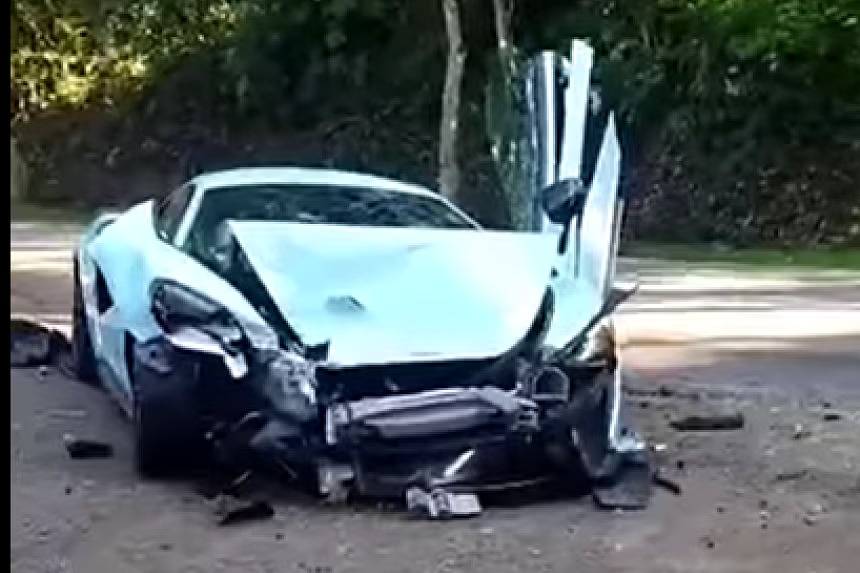

In [15]:
test_image = image.load_img(
    '../datasets/severity_detection/test/moderate/test1.jpg') # Load an image for prediction into Python
test_image

Above is an image of a moderate accident that caused damage to the front of the car. [(Source)](https://www.straitstimes.com/asia/se-asia/3-singapore-registered-supercars-crash-in-johor). 

Before using our models to predict, we pre-process the image in the code cell below.

In [16]:
test_image = test_image.resize((224,224))
test_image = image.img_to_array(test_image) # convert loaded image to array
test_image = np.expand_dims(test_image, axis=0)
test_image = preprocess_input(test_image) # pre-process inputs to be in the same format

In [17]:
cnn_result = cnn_model.predict(test_image) # predict using the model loaded, passing prepared test_image
print(f'Our CNN model predicts: {cnn_result}') # prediction is the one with highest probability

mn_result = mn_model.predict(test_image) # predict using the model loaded, passing prepared test_image
print(f'Our MobileNetV2 model predicts: {mn_result}') # prediction is the one with highest probability

vgg_result = vgg_model.predict(test_image) # predict using the model loaded, passing prepared test_image
print(f'Our VGG19 model predicts: {vgg_result}') # prediction is the one with highest probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
Our CNN model predicts: [[  3.402e-05  3.2238e-05   0.0019047     0.93496     0.06307]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Our MobileNetV2 model predicts: [[[   0.001673     0.22211    0.098595    0.021546     0.65608]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Our VGG19 model predicts: [[   0.042165       0.061      0.7062    0.061627     0.12901]]


For CNN, the highest probability is 0.93496, the test image is predicted as 'no_acc', but the true label is 'moderate'. Thus, wrong prediction.

For MobileNetV2, the highest probability is 0.65608, the test image is predicted as 'severe', but the true label is 'moderate'. Thus, wrong prediction.

For VGG19, the highest probability is 0.7062, the test image is correctly predicted as 'moderate'.

### 2.5 Prediction for No Accident Test Image

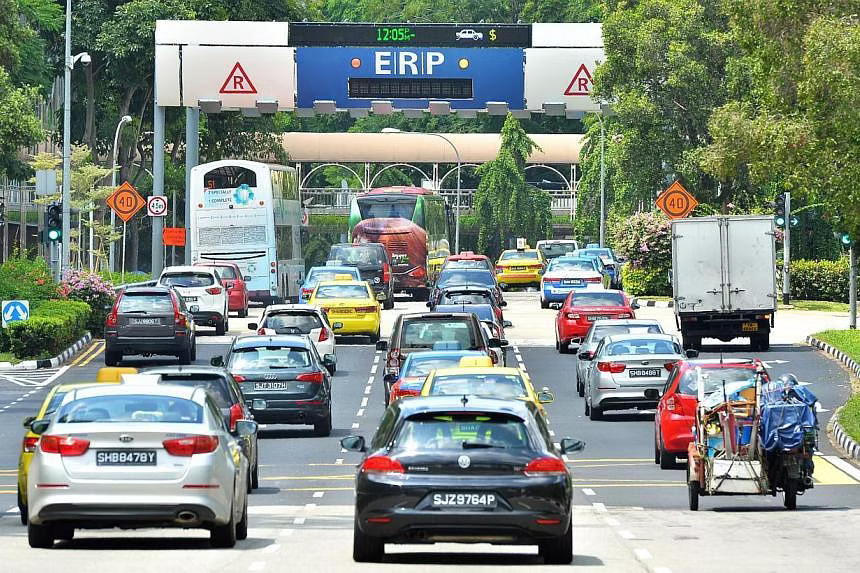

In [13]:
test_image = image.load_img(
    '../datasets/severity_detection/test/no_acc/test1.jpg') # Load an image for prediction into Python
test_image

 Above is an image of multiple vehicles on the road. No accident can be seen in it. [(Source)](https://www.straitstimes.com/singapore/transport/how-scientists-get-cars-to-talk-to-each-other-and-control-traffic-congestion). 

Before using our models to predict, we pre-process the image in the code cell below.

In [14]:
test_image = test_image.resize((224,224))
test_image = image.img_to_array(test_image) # convert loaded image to array
test_image = np.expand_dims(test_image, axis=0)
test_image = preprocess_input(test_image) # pre-process inputs to be in the same format

In [15]:
cnn_result = cnn_model.predict(test_image) # predict using the model loaded, passing prepared test_image
print(f'Our CNN model predicts: {cnn_result}') # prediction is the one with highest probability

mn_result = mn_model.predict(test_image) # predict using the model loaded, passing prepared test_image
print(f'Our MobileNetV2 model predicts: {mn_result}') # prediction is the one with highest probability

vgg_result = vgg_model.predict(test_image) # predict using the model loaded, passing prepared test_image
print(f'Our VGG19 model predicts: {vgg_result}') # prediction is the one with highest probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Our CNN model predicts: [[ 2.8026e-08    1.94e-06     0.60649     0.37969    0.013815]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Our MobileNetV2 model predicts: [[[   0.011124    0.049693     0.16119      0.6347      0.1433]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
Our VGG19 model predicts: [[   0.033215    0.025477     0.26675     0.58468    0.089872]]


For CNN, the highest probability is 0.60649, the test image is predicted as 'moderate', but the true label is 'no_acc'. Thus, wrong prediction.

For MobileNetV2, the highest probability is 0.6347, the test image is correctly predicted as 'no_acc'.

For VGG19, the highest probability is 0.58468, the test image is correctly predicted as 'no_acc'.

### 2.6 Prediction for Severe Test Image

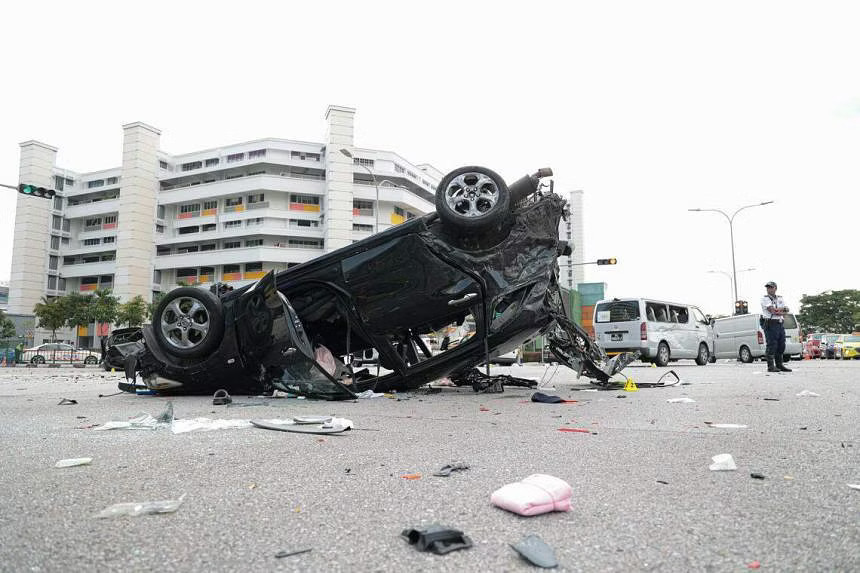

In [16]:
test_image = image.load_img(
    '../datasets/severity_detection/test/severe/test1.jpg') # Load an image for prediction into Python
test_image

 Above is an image of a car that is severely damaged and overturned. [(Source)](https://www.straitstimes.com/singapore/courts-crime/driver-involved-in-tampines-fatal-crash-identified-handed-four-charges). 

Before using our models to predict, we pre-process the image in the code cell below.

In [17]:
test_image = test_image.resize((224,224))
test_image = image.img_to_array(test_image) # convert loaded image to array
test_image = np.expand_dims(test_image, axis=0)
test_image = preprocess_input(test_image) # pre-process inputs to be in the same format

In [18]:
cnn_result = cnn_model.predict(test_image) # predict using the model loaded, passing prepared test_image
print(f'Our CNN model predicts: {cnn_result}') # prediction is the one with highest probability

mn_result = mn_model.predict(test_image) # predict using the model loaded, passing prepared test_image
print(f'Our MobileNetV2 model predicts: {mn_result}') # prediction is the one with highest probability

vgg_result = vgg_model.predict(test_image) # predict using the model loaded, passing prepared test_image
print(f'Our VGG19 model predicts: {vgg_result}') # prediction is the one with highest probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
Our CNN model predicts: [[ 0.00012842   0.0001545  0.00033561     0.99896  0.00042406]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Our MobileNetV2 model predicts: [[[ 0.00073172   0.0003632      0.1043    0.001005      0.8936]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step
Our VGG19 model predicts: [[    0.27489    0.036396      0.1325     0.51163     0.04458]]


For CNN, the highest probability is 0.99896, the test image is predicted as 'no_acc', but the true label is 'severe'. Thus, wrong prediction.

For MobileNetV2, the highest probability is 0.8936, the test image is correctly predicted as 'severe'.

For VGG19, the highest probability is 0.51163, the test image is predicted as 'no_acc', but the true label is 'severe'. Thus, wrong prediction.

# 3. Extra: Huggingface (Zero-Shot Image Classification) Model

In this section, we will explore predictions of test images using Zero-Shot model. The description of the Zero-Shot Image Classification can be found [here](https://huggingface.co/docs/transformers/en/tasks/zero_shot_image_classification). Zero-shot image classification uses a model that was not explicitly trained on data containing labeled examples from those specific categories. It is typically a model that has been trained on a large dataset of images and associated descriptions. This is a more flexible approach to image classification that allows models to generalize to new and unseen categories without the need for additional training data and enables users to query images with free-form text descriptions of their target objects.

We will be instantiating a pipeline from a [checkpoint on the Hugging Face Hub](https://huggingface.co/models?pipeline_tag=zero-shot-image-classification&sort=downloads).

In [23]:
checkpoint = "openai/clip-vit-large-patch14"
detector = pipeline(model=checkpoint, task="zero-shot-image-classification")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


### 3.1 Testing Fire Accident Image

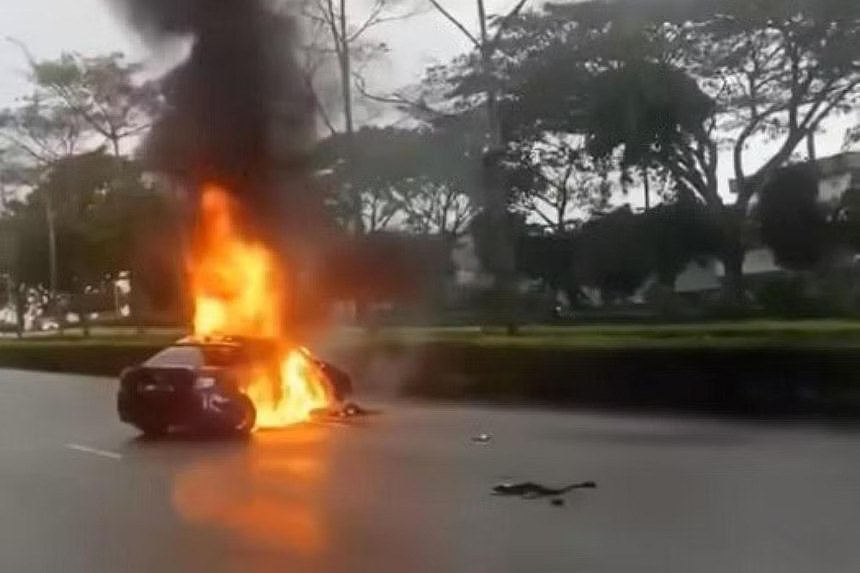

In [20]:
img_fire = image.load_img(
    '../datasets/severity_detection/test/fire/test1.jpg') # Load an image for prediction into Python

img_fire

In `candidate_labels`, we put a list of our 5 classes in strings. These strings are descriptions, which the Zero-Shot model will read, understand and associate them with the image. Then, the model will return probabilities of the associations.

In [21]:
predictions = detector(img_fire, 
                       candidate_labels=
                       ["fire accident", "minor accident", "moderate accident", "no accident", "severe accident"])
predictions

[{'score': 0.8660329580307007, 'label': 'fire accident'},
 {'score': 0.10093285888433456, 'label': 'severe accident'},
 {'score': 0.012873700819909573, 'label': 'minor accident'},
 {'score': 0.010653839446604252, 'label': 'moderate accident'},
 {'score': 0.00950665958225727, 'label': 'no accident'}]

The Zero-Shot model correctly predicts the image above as a 'fire accident'.

### 3.2 Testing Minor Accident Image

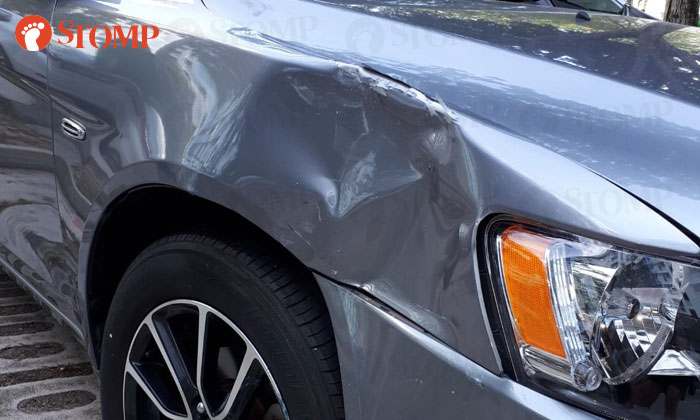

In [19]:
img_minor = image.load_img(
    '../datasets/severity_detection/test/minor/test3.jpg') # Load an image for prediction into Python

img_minor

In [24]:
predictions = detector(img_minor, 
                       candidate_labels=
                       ["fire accident", "minor accident", "moderate accident", "no accident", "severe accident"])
predictions

[{'score': 0.6180193424224854, 'label': 'minor accident'},
 {'score': 0.16647666692733765, 'label': 'no accident'},
 {'score': 0.15892527997493744, 'label': 'moderate accident'},
 {'score': 0.05580728128552437, 'label': 'severe accident'},
 {'score': 0.0007714481325820088, 'label': 'fire accident'}]

The Zero-Shot model correctly predicts the image above as a 'minor accident'.

### 3.3 Testing Moderate Accident Image

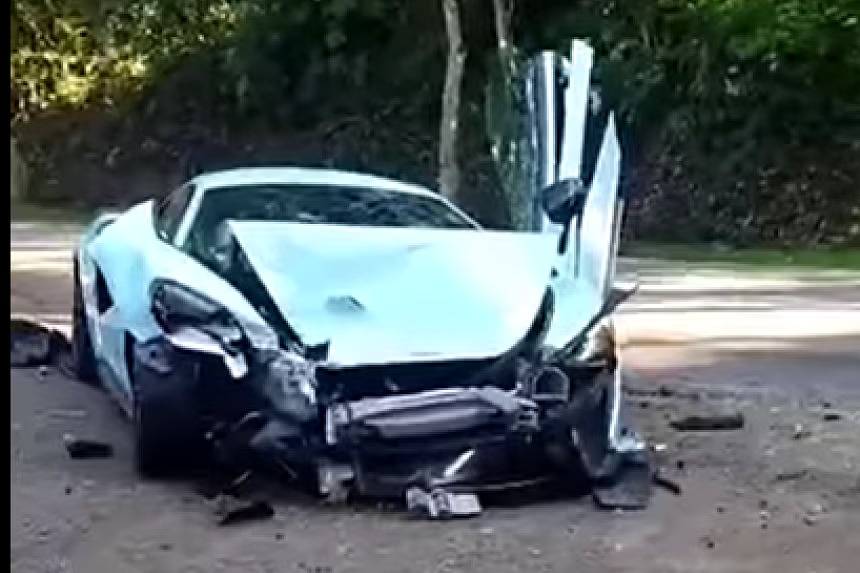

In [25]:
img_moderate = image.load_img(
    '../datasets/severity_detection/test/moderate/test1.jpg') # Load an image for prediction into Python

img_moderate

In [26]:
predictions = detector(img_moderate, 
                       candidate_labels=
                       ["fire accident", "minor accident", "moderate accident", "no accident", "severe accident"])
predictions

[{'score': 0.6337080597877502, 'label': 'severe accident'},
 {'score': 0.14948059618473053, 'label': 'minor accident'},
 {'score': 0.10097247362136841, 'label': 'moderate accident'},
 {'score': 0.09572307020425797, 'label': 'no accident'},
 {'score': 0.020115721970796585, 'label': 'fire accident'}]

The Zero-Shot model predicts the image above as a 'severe accident', but our true label is 'moderate accident'. Thus wrong classification.

### 3.4 Testing No Accident Image

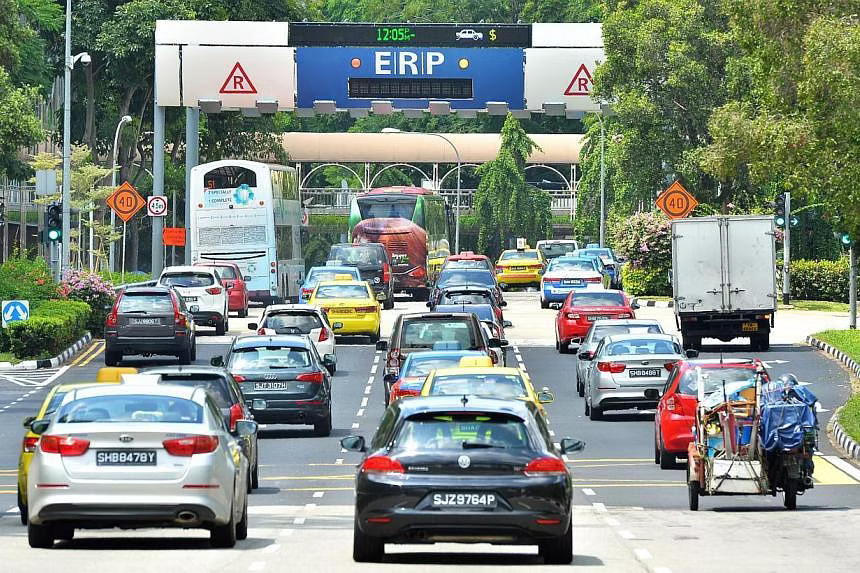

In [26]:
img_no_acc = image.load_img(
    '../datasets/severity_detection/test/no_acc/test1.jpg') # Load an image for prediction into Python

img_no_acc

In [27]:
predictions = detector(img_no_acc, 
                       candidate_labels=
                       ["fire accident", "minor accident", "moderate accident", "no accident", "severe accident"])
predictions

[{'score': 0.7274307608604431, 'label': 'no accident'},
 {'score': 0.14099843800067902, 'label': 'severe accident'},
 {'score': 0.09380418807268143, 'label': 'minor accident'},
 {'score': 0.03382110595703125, 'label': 'moderate accident'},
 {'score': 0.003945494070649147, 'label': 'fire accident'}]

The Zero-Shot model correctly predicts the image above as a 'no accident'.

### 3.5 Testing Severe Accident Image

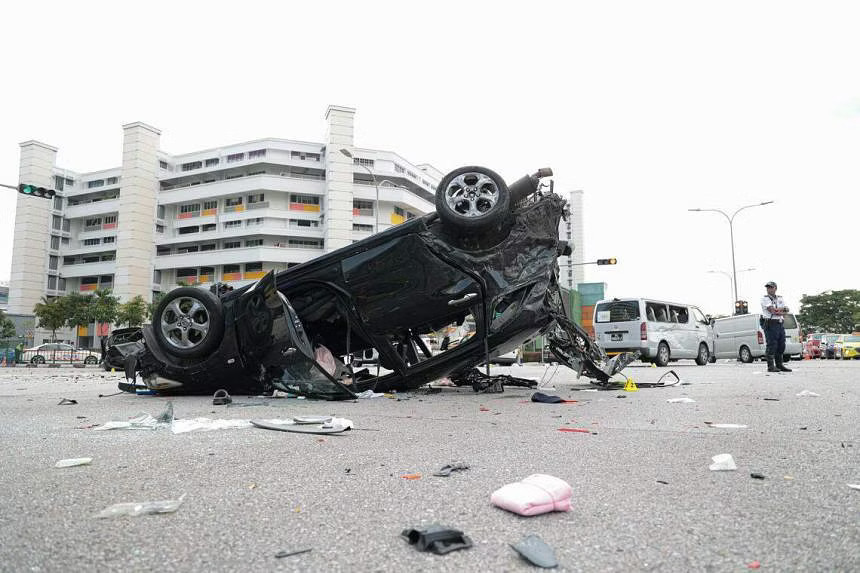

In [28]:
img_sev = image.load_img(
    '../datasets/severity_detection/test/severe/test1.jpg') # Load an image for prediction into Python

img_sev

In [29]:
predictions = detector(img_sev, 
                       candidate_labels=
                       ["fire accident", "minor accident", "moderate accident", "no accident", "severe accident"])
predictions

[{'score': 0.9049304127693176, 'label': 'severe accident'},
 {'score': 0.06656759977340698, 'label': 'moderate accident'},
 {'score': 0.019495485350489616, 'label': 'minor accident'},
 {'score': 0.004912242759019136, 'label': 'no accident'},
 {'score': 0.004094324540346861, 'label': 'fire accident'}]

The Zero-Shot model correctly predicts the image above as a 'severe accident'.

All in all, the Zero-Shot model correctly predicted four out of five test images. It did a very good job using a language model to classify images. However, there is [bias](https://www.v7labs.com/blog/zero-shot-learning-guide#challenges-in-zero-shot-learning) in the model when evaluated on samples from both seen and unseen classes. Therefore, we will avoid using this model for further analysis.

# 4. Hypertuning Best Model

In this section, we will hypertune our chosen model from the previous notebook.

### 4.1 Read train_df and valid_df csv

In [4]:
# read train_df csv
train_df = pd.read_csv('../datasets/train_df.csv')
train_df.head()

filepaths    labels
0  ../datasets/severity_acc\moderate\images_053_j...  moderate
1  ../datasets/severity_acc\no_acc\00170_jpg.rf.8...    no_acc
2  ../datasets/severity_acc\no_acc\00053_jpg.rf.8...    no_acc
3  ../datasets/severity_acc\no_acc\00012_jpg.rf.9...    no_acc
4  ../datasets/severity_acc\no_acc\59_jpg.rf.c256...    no_acc

In [5]:
# read valid_df csv
valid_df = pd.read_csv('../datasets/valid_df.csv')
valid_df.head()

filepaths    labels
0  ../datasets/severity_acc\moderate\images_060_j...  moderate
1  ../datasets/severity_acc\no_acc\194_jpg.rf.ab9...    no_acc
2  ../datasets/severity_acc\moderate\images_039--...  moderate
3  ../datasets/severity_acc\no_acc\00010_jpg.rf.2...    no_acc
4  ../datasets/severity_acc\no_acc\160_jpg.rf.eaa...    no_acc

### 4.2 Pre-processing data

In [6]:
# cropped image size
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = tr_gen.flow_from_dataframe(train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = valid_gen.flow_from_dataframe(valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

Found 647 validated image filenames belonging to 5 classes.
Found 163 validated image filenames belonging to 5 classes.


c:\Users\muzaf\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


In [7]:
class_mappings = train_gen.class_indices # save output mappings dictionary to 'class_mappings' variable to use later for predictions
print(class_mappings) # shows us the 5 categories

{'fire': 0, 'minor': 1, 'moderate': 2, 'no_acc': 3, 'severe': 4}


In [8]:
classes = list(train_gen.class_indices.keys())
classes

['fire', 'minor', 'moderate', 'no_acc', 'severe']

### 4.3 Additional Hidden Layers and Dropout

From the previous notebook, our chosen base model is MobileNetV2. Recall the accuracy and loss for our base MobileNetV2 model:

| Model | Train Accuracy | Test Accuracy | Train Loss | Test Loss |
| --------------- | --------------- | --------------- | --------------- | --------------- |
| MobileNetV2 | 0.9392 | 0.8098 | 0.2255 | 0.5140 |

Our goal is to overcome overfitting. To do that, we can use regularization methods such as dropout and early stopping. These methods will be explained as we introduce them later in the code. Let's start building our improved model!

In [27]:
# Import the desired pre-trained transfer learning model: we'll use MobileNetV2
mobilenetv2 = MobileNetV2(include_top=False, pooling='avg')

# Freeze the model so we don't accidentally change the pre-trained model parameters during dense layer gradient descent
mobilenetv2.trainable = False

C:\Users\muzaf\AppData\Local\Temp\ipykernel_11908\1139867120.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenetv2 = MobileNetV2(include_top=False, pooling='avg')


`mobilenetv2.trainable = False` ensures that during model training (gradient descent process), we don't change the weights of the pre-trained model, because this pre-trained model that we're using has already been trained and optimized for Imagenet data by Google and we want to avoid making any changes to its weights. We just want to use the CNN architecture from the pre-trained model as a feature extractor to give us a 1D vector at its output, that we will use as input to our own Neural Network classification head.

In [28]:
# Create our FNN model architecture
model_dropout = Sequential() # instantiate empty sequential model using Sequential class

# Then add the pre-trained model to use Transfer Learning, get all the weights from pre_trained_model
model_dropout.add(mobilenetv2) 

# add dense layer 1
model_dropout.add(Dense(128, activation='relu')) 
model_dropout.add(Dropout(0.5)) 
# adding a dropout layer with a 50% keeping probability of keeping every node in the 1st hidden layer

# add dense layer 2
model_dropout.add(Dense(64, activation='relu'))
model_dropout.add(Dropout(0.5)) # adding dropout to 2nd hidden layer

# Finally add our custom modifications - here, we'll just take the 1D vector output from MobileNetV2
model_dropout.add(Dense(5, activation='softmax')) # dense 1 layer & activation = 'softmax' for categorical classification

model_dropout.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

From `summary()`, the first layer is entire model with multiple layers inside. There are 2.2 million parameters. In addition, we have a dense layer with 128 nodes with dropout probability of 50%. Then, we have another dense layer with 64 nodes with dropout probability of 50%. Dropout probability of 50% means that for every node, we flip a coin, and if the coin lands on heads, the node remains, if it lands on tails, the node disappears. Also, dropout only applies during training time.

In [29]:
# Compile the model
opt = Adam(learning_rate=0.001) # specify Adam optimizer
model_dropout.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) # specify loss function and metric

We use `categorical_crossentropy` as our loss function because our problem is a multi class classification. **`Accuracy`** is selected as the primary metric for evaluation as it is easy to understand and interpret. It is the ratio of correctly predicted instances to the total number of instances. Other metrics may be too complicated for our image classification which has five classes.

To apply early stopping, there are hyperparameters that we can fine tune. For `monitor`, it refers to the metric to use to stop model training. Since our priority is to maximise accuracy and reduce overfitting, we can set it to `val_accuracy`. For `min_delta`, it refers to how much of a delta is considered no improvement in accuracy. We can set it to `0` to keep it simple. For `patience`, it refers to how many more epochs we are going to wait to confirm there is no improvement, before stopping the training. We can set it to `4`. For `mode`, it refers to either `min`, `max` or `auto`. We can set it to `auto` or `max` as we want to maximise accuracy. 

Next, during fit, we will try using 20 epochs (previously we used only 5 epochs) and see if there will be less overfitting.

In [30]:
# Instantiating EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', 
                           min_delta=0, 
                           patience=4, 
                           mode='auto')

# Fit model on training data (fit model and save results to history)
history_dropout = model_dropout.fit(train_gen, # train_data created using ImageDataGenerator class for model training
                        batch_size=16, # hyperparameter to tune
                        validation_data=valid_gen, # val_data created using ImageDataGenerator class for model valid
                        epochs=20, 
                        callbacks=[early_stop]
                       )

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 431ms/step - accuracy: 0.3352 - loss: 1.7213 - val_accuracy: 0.7362 - val_loss: 0.8592
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 466ms/step - accuracy: 0.6053 - loss: 1.0352 - val_accuracy: 0.7730 - val_loss: 0.5943
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 498ms/step - accuracy: 0.6916 - loss: 0.7960 - val_accuracy: 0.8160 - val_loss: 0.5074
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 447ms/step - accuracy: 0.7945 - loss: 0.5635 - val_accuracy: 0.8221 - val_loss: 0.4482
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 406ms/step - accuracy: 0.7771 - loss: 0.5222 - val_accuracy: 0.8344 - val_loss: 0.5012
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 425ms/step - accuracy: 0.7539 - loss: 0.5598 - val_accuracy: 0.8160 - val_loss: 0.4406
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 455ms/step - accuracy: 0.8237 - loss: 0.4603 - val_accuracy: 0.8282 - val_loss: 0.4400
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 473ms/step - accuracy: 0.7905 - loss: 0.4878 - val_accu

From above, we observe that early stopping was activated as our model training stopped after 9 epochs. From the 5th to 6th epoch, the system noticed a small drop in `val_accuracy` and waited for the next 4 epochs. Therefore, our model training stopped at epoch 9.

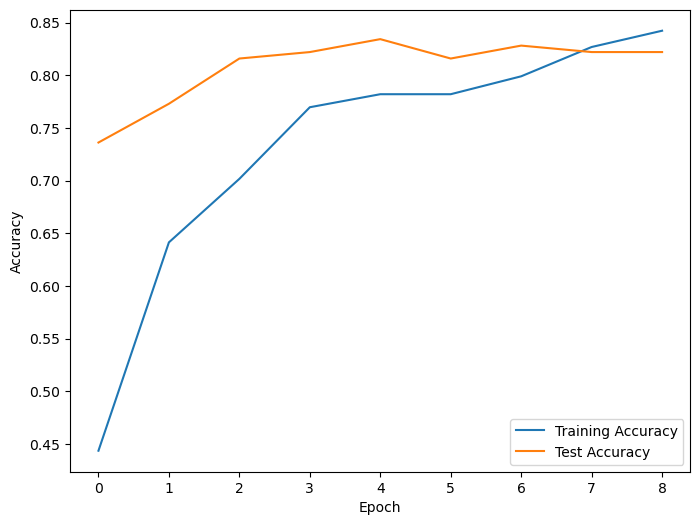

In [31]:
# Plot our train accuracy and test accuracy over epochs.
train_acc_dropout = history_dropout.history['accuracy']
test_acc_dropout = history_dropout.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(8, 6))

# Generate line plot of training, testing accuracy over the 5 epochs.
plt.plot(train_acc_dropout, label='Training Accuracy')
plt.plot(test_acc_dropout, label='Test Accuracy')

# Set title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();

From the accuracy plot, we observe that the training accuracy gets very high (around 0.84) and the test accuracy increases to around 0.82 at epoch=9. This means that there is slight overfitting as the training accuracy is about 0.02 larger than the test accuracy. However, the overfitting is smaller compared to the base MobileNetV2 model from the previous notebook.

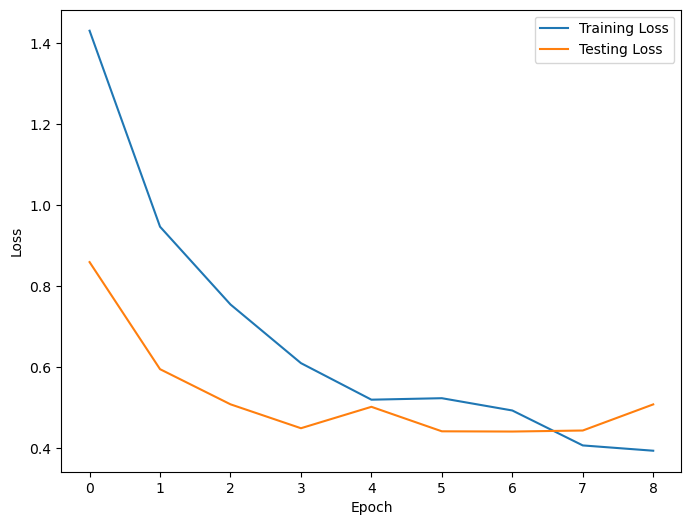

In [32]:
# Plot our train loss and test loss over epochs.
train_loss_dropout = history_dropout.history['loss']
test_loss_dropout = history_dropout.history['val_loss']

# Set figure size.
plt.figure(figsize=(8, 6))

# Generate line plot of training, testing loss over the 5 epochs.
plt.plot(train_loss_dropout, label='Training Loss')
plt.plot(test_loss_dropout, label='Testing Loss')

# Set title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

We can infer from the above loss plot that the training loss continues to drop with increasing epochs, while the testing loss drops until epoch=3, then it fluctuates slightly. Since the training loss is slightly less than the validation loss, there is slight overfitting. However, the gap between the train loss and test loss for this plot is smaller than that for our base MobileNetV2 model.

We will summarize and compare in our table below.
| Model | Epochs | Train Accuracy | Test Accuracy | Train Loss | Test Loss |
| --------------- | ---------------- | --------------- | --------------- | --------------- | --------------- |
| Base MobileNetV2 | 5 | 0.9392 | 0.8098 | 0.2255 | 0.5140 |
| MobileNetV2 with two dropout layers & early stopping | 9 | 0.8339 | 0.8221 | 0.4457 | 0.5072 |

From the table, we can see that with regularization, the train accuracy decreased by 0.1 and the test accuracy increased by 0.02. Also, the train loss increased by 0.22 and the test loss decreased by 0.01. This means that there is less overfitting with the help of regularization methods. There is a higher chance that our model works well with unseen data.

In [42]:
# save mobilenetv2 with regularization model
model_dropout.save("severity_reg.keras")

### 4.4 Test Dataset and Plotting Confusion Matrix

In this section, we will process our test dataset (containing 100 images), make predictions and plot a confusion matrix for further analysis.

In [3]:
# load model
model_dropout = load_model('severity_mnv2.keras')

c:\Users\muzaf\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 318 variables whereas the saved optimizer has 6 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [4]:
# generate images from test dataset
testing_datagen = ImageDataGenerator(rescale = 1./255)

testing_generator = testing_datagen.flow_from_directory('../datasets/severity_detection/test',
                                                batch_size = 16,
                                                class_mode = 'categorical',
                                                shuffle = False,
                                                target_size = (224,224))

Found 100 images belonging to 5 classes.


In [5]:
# Check the classes that ImageDataGenerator was able to find using .class_indices
class_mappings = testing_generator.class_indices 
print(class_mappings)

{'fire': 0, 'minor': 1, 'moderate': 2, 'no_acc': 3, 'severe': 4}


In [14]:
classes = list(testing_generator.class_indices.keys())
classes

['fire', 'minor', 'moderate', 'no_acc', 'severe']

In [6]:
# predict classes
y_pred = model_dropout.predict(testing_generator)

c:\Users\muzaf\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 497ms/step


In [7]:
# show y_pred
y_pred

<tf.RaggedTensor [[[0.98831475, 0.00022954408, 0.0003228181, 0.0110216, 0.000111349604],
  [0.23874538, 0.13354215, 0.4453544, 0.12224488, 0.060113177],
  [0.9978588, 0.00011759398, 0.0016384971, 0.00021093503, 0.00017409239],
  [0.14146195, 0.012973122, 0.09575287, 0.7278047, 0.022007313],
  [0.72362846, 0.0010737841, 0.047714498, 0.043088846, 0.18449439],
  [0.24619873, 0.01964423, 0.10525994, 0.55863816, 0.070258975],
  [0.9898505, 6.702403e-05, 0.004638654, 0.00030429932, 0.0051394417],
  [0.86943483, 0.0054648374, 0.007094205, 0.0998069, 0.018199304],
  [0.20410351, 0.0026188253, 0.6834387, 0.0606689, 0.049170088],
  [0.7273827, 0.0039991247, 0.22083165, 0.001702121, 0.046084464],
  [0.9964606, 5.050278e-05, 0.0025913392, 0.0007390917, 0.00015851244],
  [0.52189636, 0.05019155, 0.05738287, 0.36916494, 0.0013642425],
  [0.99412775, 0.0005924952, 0.0030400802, 0.0012716246, 0.00096801046],
  [0.581592, 0.0051681558, 0.022809552, 0.38579822, 0.0046320357],
  [0.48989642, 0.0006251107

The shape / format of `y_pred` is not suitable for the next step, which is using `np.argmax` to find the index with the highest probability. Thus, we need to amend the `y_pred` using `tf.concat`.

In [8]:
# convert to the shape of (100, 5)
y_pred = tf.concat([y_pred[0], y_pred[1], y_pred[2], y_pred[3], y_pred[4], y_pred[5], y_pred[6]], 0)

In [9]:
# display y_pred
y_pred

<tf.Tensor: shape=(100, 5), dtype=float32, numpy=
array([[9.88314748e-01, 2.29544079e-04, 3.22818087e-04, 1.10216001e-02,
        1.11349604e-04],
       [2.38745376e-01, 1.33542150e-01, 4.45354402e-01, 1.22244880e-01,
        6.01131767e-02],
       [9.97858822e-01, 1.17593983e-04, 1.63849711e-03, 2.10935032e-04,
        1.74092391e-04],
       [1.41461954e-01, 1.29731223e-02, 9.57528725e-02, 7.27804720e-01,
        2.20073126e-02],
       [7.23628461e-01, 1.07378408e-03, 4.77144979e-02, 4.30888459e-02,
        1.84494391e-01],
       [2.46198729e-01, 1.96442306e-02, 1.05259940e-01, 5.58638155e-01,
        7.02589750e-02],
       [9.89850521e-01, 6.70240333e-05, 4.63865418e-03, 3.04299319e-04,
        5.13944170e-03],
       [8.69434834e-01, 5.46483742e-03, 7.09420489e-03, 9.98068973e-02,
        1.81993041e-02],
       [2.04103515e-01, 2.61882530e-03, 6.83438718e-01, 6.06689006e-02,
        4.91700880e-02],
       [7.27382720e-01, 3.99912475e-03, 2.20831648e-01, 1.70212099e-03,
     

In [42]:
# y_pred = y_pred.reshape(-1,y_pred.shape[2])

Now, we use `np.argmax` to return an array of integers (0 to 4), where the index of the highest probability occured in `y_pred`. These are our predictions `y_pred_classes`.

In [10]:
# find index of highest probability of each row
y_pred_classes = np.argmax(y_pred, axis=-1)
y_pred_classes

array([0, 2, 0, 3, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 3, 4, 2, 4, 2, 3, 2, 4, 2, 3, 2, 4, 3, 2, 4, 3, 4, 2, 4,
       2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 2, 4, 2, 4, 4, 4, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 2, 4, 4, 4,
       4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4], dtype=int64)

Next we show the true labels by running `testing_generator.classes`.

In [11]:
# show true labels, y_true
testing_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

And finally, we plot the confusion matrix, given the predictions and true labels.

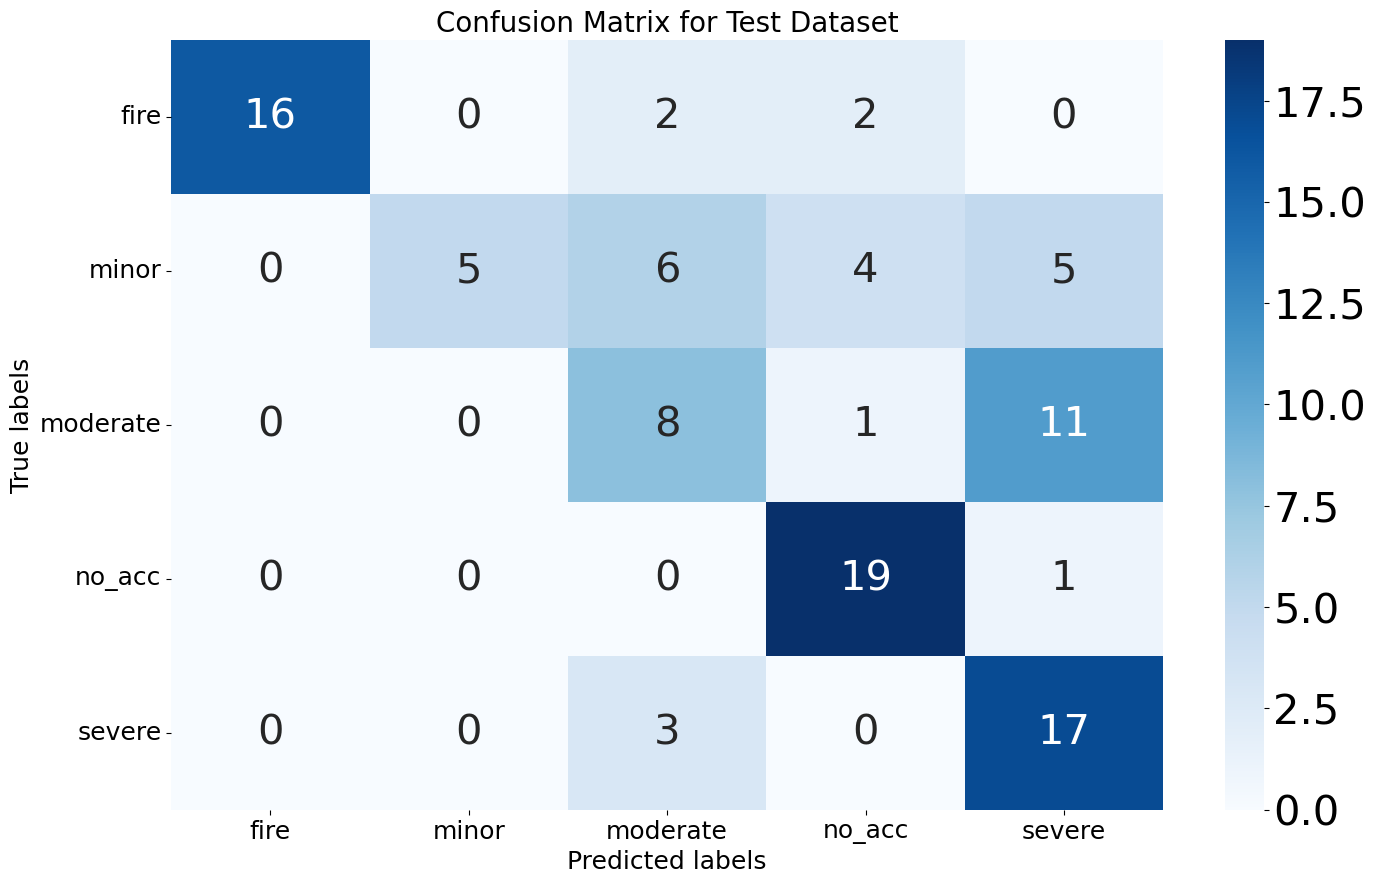

In [23]:
# Calculate confusion matrix
conf_mat = tf.math.confusion_matrix(testing_generator.classes, y_pred_classes)

# Convert to numpy array
conf_mat_np = conf_mat.numpy()

# Plot confusion matrix
plt.figure(figsize=(16, 10))
plt.rcParams.update({'font.size': 30})
sns.heatmap(conf_mat_np, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels', fontsize=18)
plt.ylabel('True labels', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Confusion Matrix for Test Dataset', fontsize=20)
plt.show()

Recall that we have 20 images in each of the 5 classes. For `fire` images, 16 out of 20 images were predicted correctly. For `no_acc` images, 19 out of 20 images were predicted correctly. For `severe` images, 17 out of 20 images were predicted correctly. For each `moderate` and `minor` images, less than half were predicted correctly.

As for the wrong predictions,
- 11 images were predicted to be `severe`, but their true labels were `moderate`.
- 6+4+5 = 15 images were predicted to be `moderate`, `no_acc` and `severe`, but their true labels were `minor`.

This shows how bad our model is at predicting `minor` and `moderate` classes. Nonetheless, we can calculate the accuracy of our model on the test dataset:

In [80]:
print(f'Accuracy = {(16+5+8+19+17)/100}')

Accuracy = 0.65


In other words, 65% of the test dataset was predicted correctly by our model! This is not bad as we can proceed to improve our model by focusing mainly on the `minor` and `moderate` classes. We will discuss the limitations and recommendations in the next section.

# 5. Learnings

### 5.1 Limitations

Inaccuracy in some classes:
- Difficult to predict minor and moderate accidents.
- Some images look similar, thus unable to be predicted correctly by our model.

Unclear definitions for minor, moderate and severe accidents:
- While ‘fire’ and ‘no_acc’ are classes with clear identities, there are no clear definitions for a minor, moderate or severe accident. 
- It was also not mentioned by the author of the dataset.

Data Formats:
- Deeper analysis cannot be done on severity of an accident without other details such as number of people injured and estimated speed before collision.

### 5.2 Recommendations

Data Augmentation:
- More images can be [augmented](https://www.tensorflow.org/tutorials/images/data_augmentation#random_transformations) by flipping, saturating and cropping.
- More transformations can further help to generalize and expand our accident dataset.
- With augmentations, there may be clearer distinctions between minor and moderate accidents.

Relate severity of accident to injuries suffered:
- An injury can be classified into [different tiers](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8801850/) based on Injury Severity Score (ISS).
- Relating this to accident severity can be done as future research.

Using dashcam for severity analysis:
- Severity of an accident can also depend on the speed of the vehicles involved. 
- Using a dashcam can potentially estimate the [speed of the vehicle](https://www.vantrue.com/blogs/news/dashcam-with-speed-recording).
- However, dashcam recordings cannot be accessed immediately after an accident.

# 6. Conclusion

In the previous notebooks, our objective was to classify accidents into five severity classes. Our process is documented briefly as below:

1. Data Preprocessing and Analysis - We retrieved data from Singstat and Roboflow, researched, plotted graphs for the context of the problem statement, and preprocessed the image dataset.
2. Classification Modelling - Ran through a self-trained CNN model and 3 pre-trained models to compare and select 1 model for hypertuning based on accuracy score (to improve number of correct predictions) and evaluating the final model.
3. Zero-Shot Classification - Explored using the Zero-Shot Image Classification on five images from our test dataset.

Despite some limitations above that eventually posed as a barrier to reach our goal, we believe that there is still value in creating an accurate multi-class image predictor to identify different severity of accidents for immediate response from various services. Deployment of resources from SCDF and tow truck companies to the accident scene can be more efficient.

Other agencies or authorities like vehicle insurance companies and the Traffic Police may benefit from our severity classifier. Vehicle insurance companies can use this to calculate insurance claims, while the Traffic Police can use this for further enhancements of road safety.